# EDA-Visualization_COVID-19

## Programming Language: R

In [5]:
library(readr)
library(ggplot2)
library(dplyr)
library(tidyverse)

In [6]:
confirmed_cases_worldwide <- read_csv("datasets/confirmed_cases_worldwide.csv")

Rows: 56 Columns: 2

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
dbl  (1): cum_cases
date (1): date


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [7]:
head(confirmed_cases_worldwide)

date,cum_cases
<date>,<dbl>
2020-01-22,555
2020-01-23,653
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
2020-01-27,2927


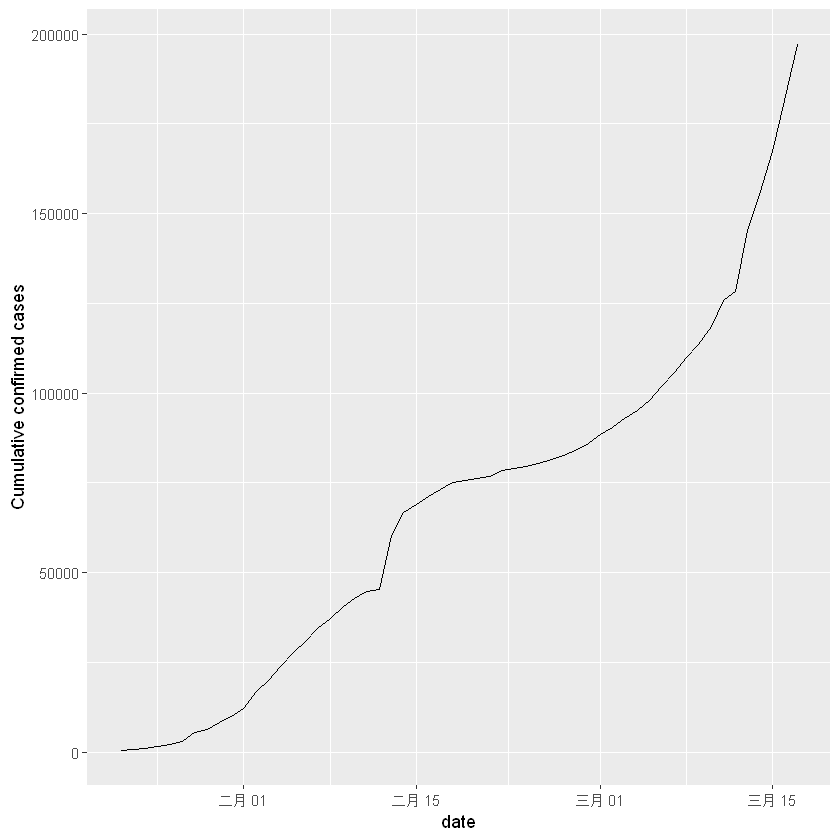

In [8]:
# Draw a line plot of cumulative cases vs. date
# Label the y-axis
confirmed_cases_worldwide %>%
  ggplot(aes(x= date, y= cum_cases)) +
    geom_line() +
    labs(y= "Cumulative confirmed cases")

In [9]:
confirmed_cases_china_vs_world <- read_csv("datasets/confirmed_cases_china_vs_world.csv")

Rows: 112 Columns: 4

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): is_china
dbl  (2): cases, cum_cases
date (1): date


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [10]:
glimpse(confirmed_cases_china_vs_world)

Rows: 112
Columns: 4
$ is_china  <chr> "China", "China", "China", "China", "China", "China", "China~
$ date      <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26,~
$ cases     <dbl> 548, 95, 277, 486, 669, 802, 2632, 578, 2054, 1661, 2089, 47~
$ cum_cases <dbl> 548, 643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802, 118~


In [11]:
# Draw a line plot of cumulative cases vs. date, grouped and colored by is_china
# Define aesthetics within the line geom
plt_cum_confirmed_cases_china_vs_world <- ggplot(confirmed_cases_china_vs_world) +
                                            geom_line(aes(x= date, y= cum_cases, group= is_china, color= is_china)) +
                                            ylab("Cumulative confirmed cases")

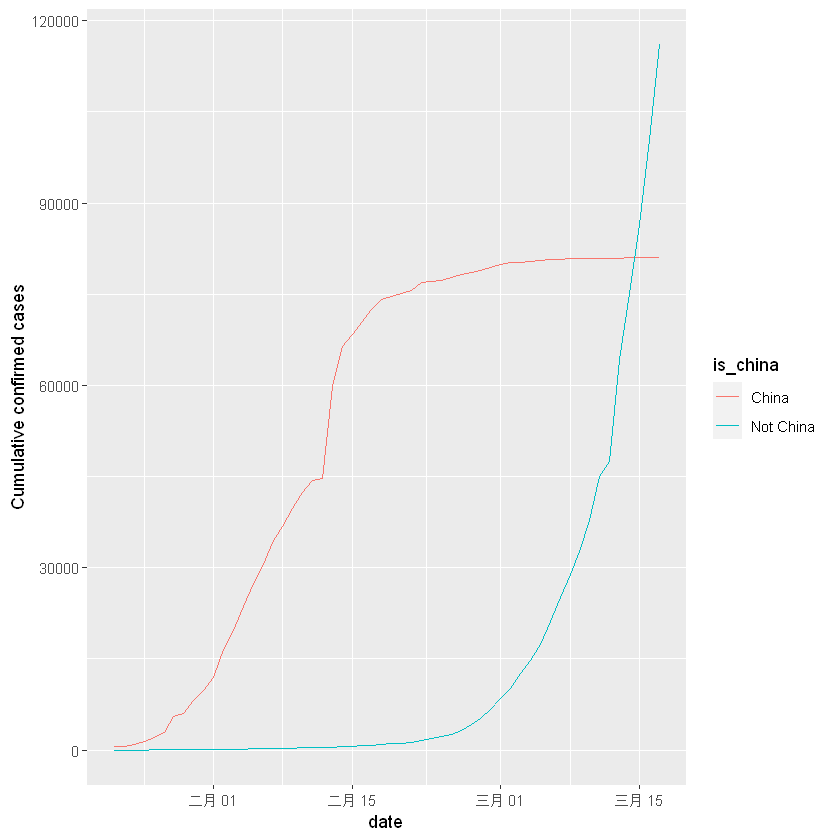

In [12]:
plt_cum_confirmed_cases_china_vs_world

- The two lines have very different shapes. In February, the majority of cases were in China. That changed in March when it really became a global outbreak: around March 14, the total number of cases outside China overtook the cases inside China. This was days after the WHO declared a pandemic. There were a couple of other landmark events that happened during the outbreak.

In [13]:
who_events <- tribble(
  ~ date, ~ event,
  "2020-01-30", "Global health\nemergency declared",
  "2020-03-11", "Pandemic\ndeclared",
  "2020-02-13", "China reporting\nchange"
) %>%
  mutate(date = as.Date(date))

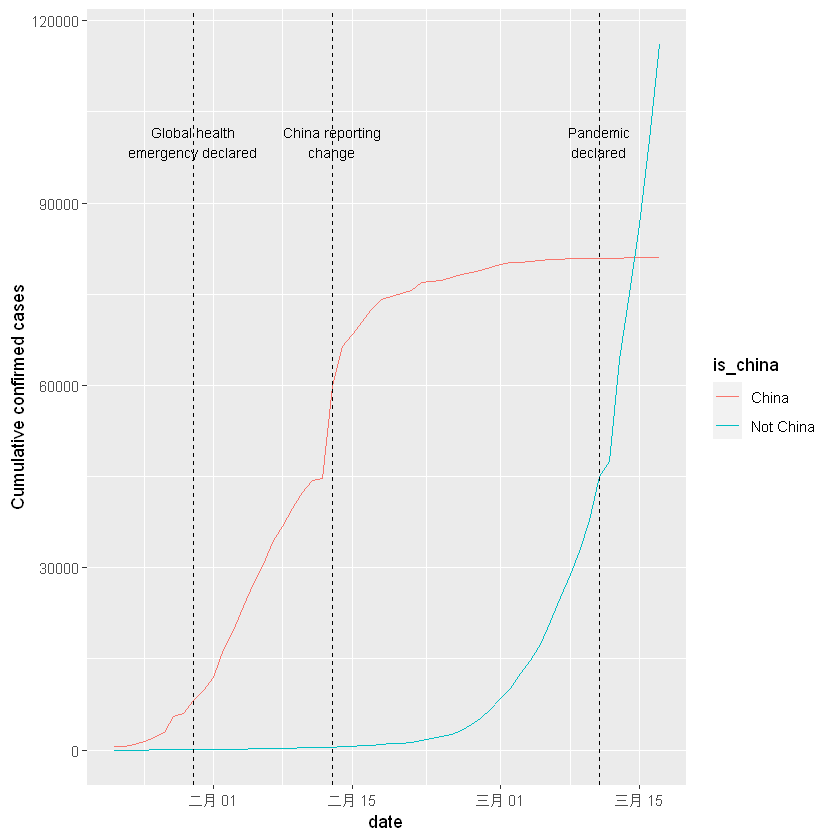

In [14]:
# Using who_events, add vertical dashed lines with an xintercept at date
# and text at date, labeled by event, and at 100000 on the y-axis
plt_cum_confirmed_cases_china_vs_world +
  geom_vline(data= who_events, aes(xintercept= date), linetype= "dashed")+
  geom_text(data= who_events, aes(x=date, label=event), y=100000, size= 3)

In [15]:
china_after_feb15 <- confirmed_cases_china_vs_world %>%
  filter(is_china=="China", date >= "2020-02-15")

- There is a clear surge of cases around February 13, 2020, with the reporting change in China. However, a couple of days after, the growth of cases in China slows down. 
- How can we describe COVID-19's growth in China after February 15, 2020?


In [16]:
# Filter for China, from Feb 15
china_after_feb15 <- confirmed_cases_china_vs_world %>%
  filter(is_china=="China", date >= "2020-02-15")

- The growth rate in China is slower than linear. That's great news because it indicates China has at least somewhat contained the virus in late February and early March.

`geom_smooth()` using formula 'y ~ x'



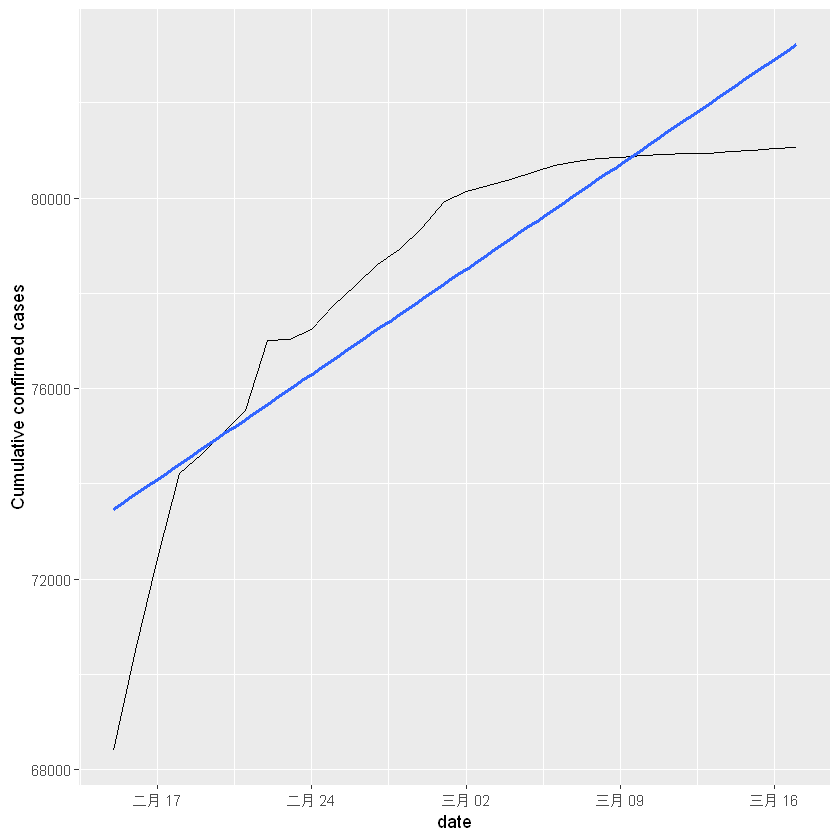

In [17]:
china_after_feb15 %>%
  ggplot(aes(x= date, y= cum_cases))+
    geom_line()+
    geom_smooth(method= "lm", se= F)+
  ylab("Cumulative confirmed cases")

- How does the rest of the world compare to linear growth?

In [18]:
# Filter confirmed_cases_china_vs_world for not China
confirmed_cases_china_vs_world %>%
 filter(is_china!="China", date>= 2020-02-15) -> not_china

`geom_smooth()` using formula 'y ~ x'



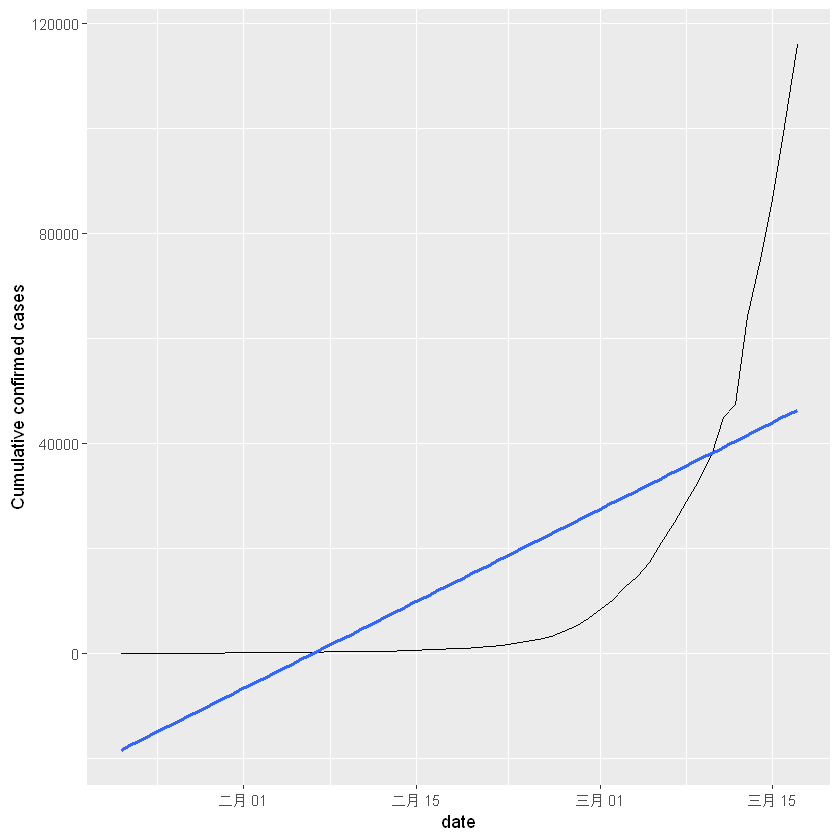

In [19]:
plt_not_china_trend_lin <- not_china %>%
  ggplot(aes(x= date, y=cum_cases))+
    geom_line()+
    geom_smooth(method= "lm", se=F)+
  ylab("Cumulative confirmed cases")

# See the result
plt_not_china_trend_lin 

- we can see a straight line does not fit well at all, and the rest of the world is growing much faster than linearly. 
- What if we added a logarithmic scale to the y-axis?

`geom_smooth()` using formula 'y ~ x'



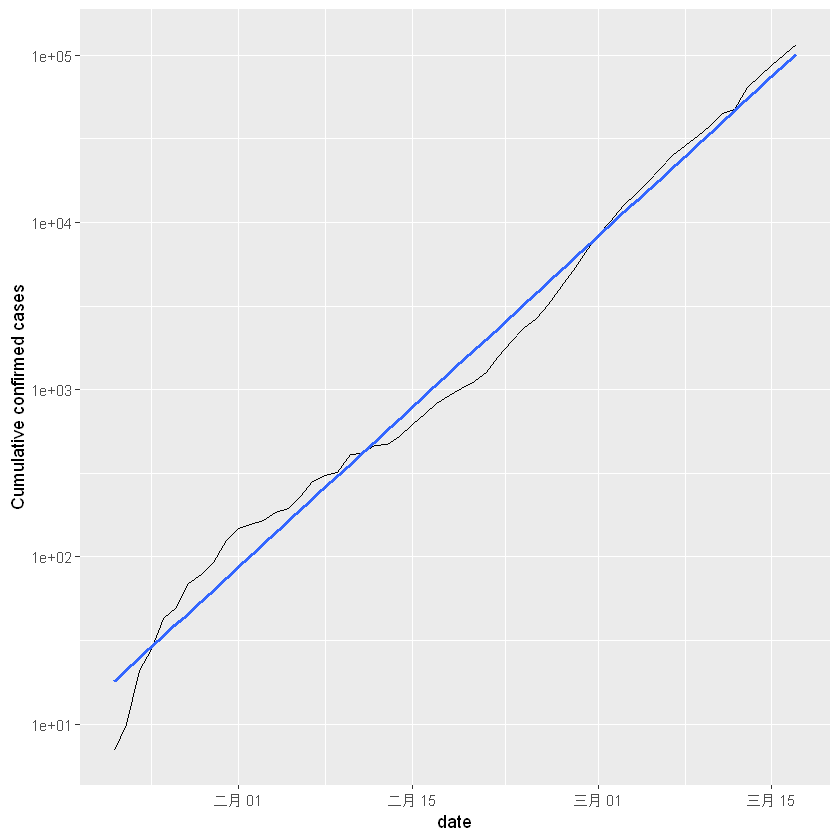

In [21]:
# Modify the plot to use a logarithmic scale on the y-axis
plt_not_china_trend_lin + 
  scale_y_log10()

- With the logarithmic scale, we get a much closer fit to the data. From a data science point of view, a good fit is great news. 
- Unfortunately, from a public health point of view, that means that cases of COVID-19 in the rest of the world are growing at an exponential rate, which is terrible news.
- Not all countries are being affected by COVID-19 equally, and it would be helpful to know where in the world the problems are greatest. 
- Let's find the countries outside of China with the most confirmed cases in our dataset.

In [22]:
confirmed_cases_by_country <- read_csv("datasets/confirmed_cases_by_country.csv")
glimpse(confirmed_cases_by_country)

Rows: 13272 Columns: 5

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (2): country, province
dbl  (2): cases, cum_cases
date (1): date


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Rows: 13,272
Columns: 5
$ country   <chr> "Afghanistan", "Albania", "Algeria", "Andorra", "Antigua and~
$ province  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ~
$ date      <date> 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22,~
$ cases     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ cum_cases <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~


In [24]:
# Group by country, summarize to calculate total cases, find the top 7
top_countries_by_total_cases <- confirmed_cases_by_country %>%
  group_by(country) %>%
  summarize(total_cases = max(cum_cases)) %>%
  top_n(7, total_cases)

In [25]:
# See the result
arrange(top_countries_by_total_cases,desc(total_cases))

country,total_cases
<chr>,<dbl>
Italy,31506
Iran,16169
Spain,11748
Germany,9257
"Korea, South",8320
France,7699
US,6421


- Even though the outbreak was first identified in China, there is only one country from East Asia (South Korea) in the above table.
- Four of the listed countries (France, Germany, Italy, and Spain) are in Europe and share borders. To get more context, we can plot these countries' confirmed cases over time.

In [26]:
# Run this to get the data for the top 7 countries
confirmed_cases_top7_outside_china <- read_csv("datasets/confirmed_cases_top7_outside_china.csv")

Rows: 2030 Columns: 3

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): country
dbl  (1): cum_cases
date (1): date


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



Rows: 2,030
Columns: 3
$ country   <chr> "Germany", "Iran", "Italy", "Korea, South", "Spain", "US", "~
$ date      <date> 2020-02-18, 2020-02-18, 2020-02-18, 2020-02-18, 2020-02-18,~
$ cum_cases <dbl> 16, 0, 3, 31, 2, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,~


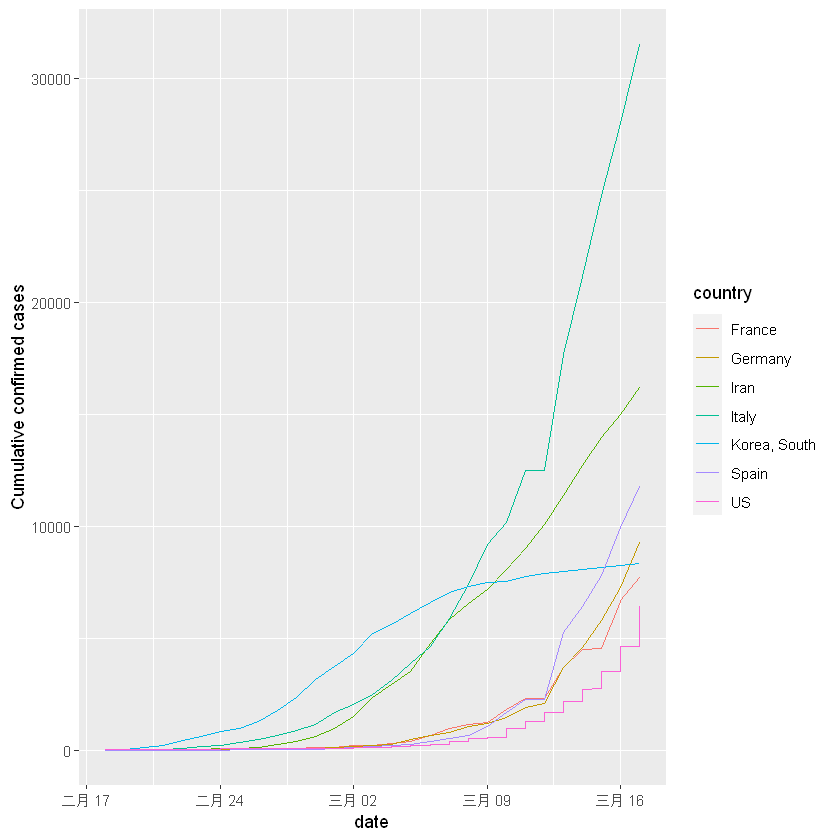

In [27]:
glimpse(confirmed_cases_top7_outside_china)

# Using confirmed_cases_top7_outside_china, draw a line plot of
# cum_cases vs. date, grouped and colored by country
confirmed_cases_top7_outside_china %>%
ggplot(aes(x= date, y= cum_cases, group= country, color= country))+
  geom_line()+
ylab("Cumulative confirmed cases")

## Result

we analyze data before the whole world pandamic (March 2020). And We found that China control their confirmed cases well, however, other countries didn't. Other countries just began and exploded after March which is what we know for now.